# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist, cifar10
import numpy as np

# Loading Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
y_train1 = keras.utils.to_categorical(y_train, 10)
y_test1 = keras.utils.to_categorical(y_test, 10)

# Creating a Model

In [ ]:
def my_model1():
    inputs = keras.Input(shape=(28,28,1), name='Input')
    x = layers.Conv2D(16,3, activation='relu', name='Conv2D_1')(inputs)
    # x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(name='MaxPool2D_1')(x)
    x = layers.Conv2D(32,3, activation='relu', name='Conv2D_2')(x)
    # x = layers.MaxPool2D()(x)
    x = layers.Conv2D(64,3, activation='relu', name='Conv2D_3')(x)
    # x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(name='MaxPool2D_2')(x)
    # x = layers.Conv2D(128,3, activation='relu')(x)
    # x = layers.BatchNormalization()(x)
    # x = layers.MaxPool2D()(x)
    x = layers.Flatten(name='Flatten')(x)
    x = layers.Dense(64, activation='relu', name='Dense_1')(x)
    x = layers.Dropout(0.5, name='Dropout_1')(x)
    outputs = layers.Dense(10, activation='softmax', name='Dense_2')(x)
    model = keras.Model(inputs, outputs)
    return model

In [ ]:
model = my_model1()
model.compile(
    optimizer = keras.optimizers.Adam(0.001),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy'],
)

# Fitting a model

In [ ]:
model.fit(X_train, y_train1, batch_size=128, epochs=20, verbose=2, validation_split=0.1)

Epoch 1/20
422/422 - 5s - loss: 0.4896 - accuracy: 0.8462 - val_loss: 0.0709 - val_accuracy: 0.9798
Epoch 2/20
422/422 - 1s - loss: 0.1709 - accuracy: 0.9492 - val_loss: 0.0459 - val_accuracy: 0.9865
Epoch 3/20
422/422 - 1s - loss: 0.1276 - accuracy: 0.9627 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 4/20
422/422 - 2s - loss: 0.1029 - accuracy: 0.9696 - val_loss: 0.0357 - val_accuracy: 0.9895
Epoch 5/20
422/422 - 1s - loss: 0.0870 - accuracy: 0.9737 - val_loss: 0.0372 - val_accuracy: 0.9898
Epoch 6/20
422/422 - 1s - loss: 0.0749 - accuracy: 0.9767 - val_loss: 0.0311 - val_accuracy: 0.9903
Epoch 7/20
422/422 - 1s - loss: 0.0658 - accuracy: 0.9794 - val_loss: 0.0354 - val_accuracy: 0.9903
Epoch 8/20
422/422 - 1s - loss: 0.0612 - accuracy: 0.9816 - val_loss: 0.0316 - val_accuracy: 0.9927
Epoch 9/20
422/422 - 1s - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0309 - val_accuracy: 0.9912
Epoch 10/20
422/422 - 1s - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0293 - val_accuracy: 0.9938

# Evaluating on Test Data

In [ ]:
model.evaluate(X_test, y_test1, batch_size=32, verbose=2)

313/313 - 1s - loss: 0.0251 - accuracy: 0.9933


[0.02512182854115963, 0.9933000206947327]

In [ ]:
np.argmax(model.predict(X_test[0:1]))

7

In [ ]:
y_test[0]

7

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv2D_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
MaxPool2D_1 (MaxPooling2D)   (None, 13, 13, 16)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
MaxPool2D_2 (MaxPooling2D)   (None, 4, 4, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 1024)              0     

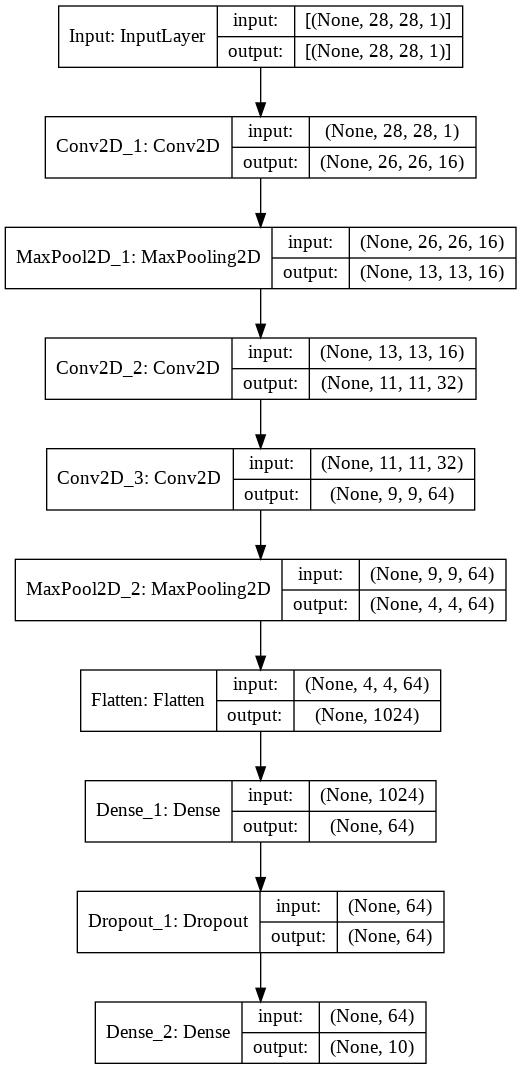

In [ ]:
keras.utils.plot_model(model, to_file='MNIST_CNN.jpg',show_shapes=True)

# Test on real images

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
from skimage.color import rgb2gray
import numpy as np

In [ ]:
img0 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/0.png')
img1 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/1.png')
img2 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/2.png')
img3 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/3.png')
img4 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/4.png')
img5 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/5.png')
img6 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/6.png')
img7 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/7.png')
img8 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/88(1).jpg')
img9 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/9.png')

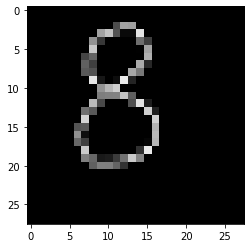

In [ ]:
plt.imshow(img8)
#img0.shape

In [ ]:
greyimg0 = rgb2gray(img0).reshape(28,28,1)
greyimg1 = rgb2gray(img1).reshape(28,28,1)
greyimg2 = rgb2gray(img2).reshape(28,28,1)
greyimg3 = rgb2gray(img3).reshape(28,28,1)
greyimg4 = rgb2gray(img4).reshape(28,28,1)
greyimg5 = rgb2gray(img5).reshape(28,28,1)
greyimg6 = rgb2gray(img6).reshape(28,28,1)
greyimg7 = rgb2gray(img7).reshape(28,28,1)
greyimg8 = rgb2gray(img8).reshape(28,28,1)
greyimg9 = rgb2gray(img9).reshape(28,28,1)

In [ ]:
temp0 = np.concatenate((greyimg0, greyimg1, greyimg2, greyimg3, greyimg4, greyimg5, greyimg6, greyimg7, greyimg8, greyimg9,), axis=None)
temp0 = temp0.reshape(10,28,28,1)

In [ ]:
print(np.argmax(model.predict(temp0[0:1])))
print(np.argmax(model.predict(temp0[1:2])))
print(np.argmax(model.predict(temp0[2:3])))
print(np.argmax(model.predict(temp0[3:4])))
print(np.argmax(model.predict(temp0[4:5])))
print(np.argmax(model.predict(temp0[5:6])))
print(np.argmax(model.predict(temp0[6:7])))
print(np.argmax(model.predict(temp0[7:8])))
print(np.argmax(model.predict(temp0[8:9])))
print(np.argmax(model.predict(temp0[9:])))

0
1
2
3
4
5
6
7
6
9


In [ ]:
img00 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/00.jpg')
img11 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/11.jpg')
img22 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/22.jpg')
img33 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/33.jpg')
img44 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/44.jpg')
img55 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/55.jpg')
img66 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/66.jpg')
img77 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/77.jpg')
img88 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/88.jpg')
img99 = image.imread('/content/drive/MyDrive/Datasets/MNIST/Real Images/99.jpg')

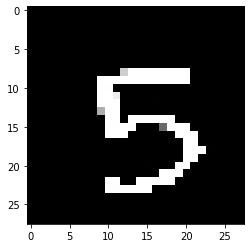

In [ ]:
plt.imshow(img55)
#img0.shape

In [ ]:
greyimg00 = rgb2gray(img00).reshape(28,28,1)
greyimg11 = rgb2gray(img11).reshape(28,28,1)
greyimg22 = rgb2gray(img22).reshape(28,28,1)
greyimg33 = rgb2gray(img33).reshape(28,28,1)
greyimg44 = rgb2gray(img44).reshape(28,28,1)
greyimg55 = rgb2gray(img55).reshape(28,28,1)
greyimg66 = rgb2gray(img66).reshape(28,28,1)
greyimg77 = rgb2gray(img77).reshape(28,28,1)
greyimg88 = rgb2gray(img88).reshape(28,28,1)
greyimg99 = rgb2gray(img99).reshape(28,28,1)

In [ ]:
temp00 = np.concatenate((greyimg00, greyimg11, greyimg22, greyimg33, greyimg44, greyimg55, greyimg66, greyimg77, greyimg88, greyimg99), axis=None)
temp00 = temp00.reshape(10,28,28,1)

In [ ]:
print(np.argmax(model.predict(temp00[0:1])))
print(np.argmax(model.predict(temp00[1:2])))
print(np.argmax(model.predict(temp00[2:3])))
print(np.argmax(model.predict(temp00[3:4])))
print(np.argmax(model.predict(temp00[4:5])))
print(np.argmax(model.predict(temp00[5:6])))
print(np.argmax(model.predict(temp00[6:7])))
print(np.argmax(model.predict(temp00[7:8])))
print(np.argmax(model.predict(temp00[8:9])))
print(np.argmax(model.predict(temp00[9:])))

0
1
2
3
4
5
5
7
8
9
